In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import mnist_reader
from sklearn.preprocessing import normalize

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
training_images, training_labels = mnist_reader.load_mnist('data/fashion', kind='train')
test_images, test_labels = mnist_reader.load_mnist('data/fashion', kind='t10k')
images = np.array(list(training_images) + list(test_images))
images = images / np.linalg.norm(images)
# session = tf.InteractiveSession()

In [ ]:
training_labels[1]

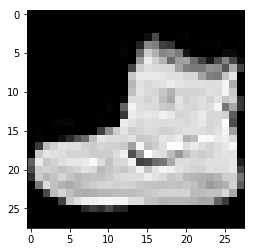

In [3]:
plt.imshow(images[0].reshape(28, 28), cmap='gray')

In [6]:
# Training Parameters
learning_rate = 0.0005
num_epochs = 16
num_steps = 10000
batch_size = 100

display_step = 5000

num_hidden_1 = 256 
num_hidden_2 = 256 
num_input = 784 


X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.zeros([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.zeros([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.zeros([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.zeros([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.zeros([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.zeros([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.zeros([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.zeros([num_input])),
}

In [7]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [8]:

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X


loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)


init = tf.global_variables_initializer()

In [10]:
sess = tf.Session()
sess.run(init)


# Training
for epoch in range(num_epochs):
    print("Epoch: " + str(epoch))
    for index in range(num_steps):
        start_index = (index * batch_size) % len(training_images)
        end_index = ((index + 1) * batch_size) % len(training_images)
        batch_x = training_images[start_index: end_index]
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        if index % display_step == 0 or index == 1:
            print('Step %i: Minibatch Loss: %f' % (index, l))
    print("\n=======================================\n")

    

Epoch: 0
Step 0: Minibatch Loss: 13383.419922
Step 1: Minibatch Loss: 13368.373047
Step 5000: Minibatch Loss: 13326.765625


Epoch: 1
Step 0: Minibatch Loss: 13310.948242
Step 1: Minibatch Loss: 13298.150391
Step 5000: Minibatch Loss: 13326.678711


Epoch: 2
Step 0: Minibatch Loss: 13310.938477
Step 1: Minibatch Loss: 13298.141602
Step 5000: Minibatch Loss: 13326.682617


Epoch: 3
Step 0: Minibatch Loss: 13310.937500
Step 1: Minibatch Loss: 13298.140625
Step 5000: Minibatch Loss: 13326.682617


Epoch: 4
Step 0: Minibatch Loss: 13310.937500
Step 1: Minibatch Loss: 13298.141602
Step 5000: Minibatch Loss: 13326.683594


Epoch: 5
Step 0: Minibatch Loss: 13310.937500
Step 1: Minibatch Loss: 13298.140625
Step 5000: Minibatch Loss: 13326.685547


Epoch: 6
Step 0: Minibatch Loss: 13310.937500
Step 1: Minibatch Loss: 13298.140625
Step 5000: Minibatch Loss: 13326.685547


Epoch: 7
Step 0: Minibatch Loss: 13310.937500
Step 1: Minibatch Loss: 13298.140625
Step 5000: Minibatch Loss: 13326.685547




In [ ]:
reconstructed_images = []
g = sess.run(decoder_op, feed_dict={X:images})
reconstructed_images = list(g)

In [ ]:
np.array(reconstructed_images).shape

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(reconstructed_images[:60000], training_labels)
predicted_labels = log_reg.predict(reconstructed_images[60000:])
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(images[:60000], training_labels)
predicted_labels = log_reg.predict(images[60000:])
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

In [ ]:
plt.imshow(training_images[67].reshape(28,28), cmap='gray')

In [ ]:
plt.imshow(reconstructed_images[67].reshape(28,28), cmap='gray')

In [ ]:
reconstructed_images_reduced_dim = []
g = sess.run(encoder_op, feed_dict={X:images})
reconstructed_images_reduced_dim = list(g)

In [ ]:
np.array(reconstructed_images_reduced_dim).shape

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(reconstructed_images_reduced_dim[:60000], training_labels)
predicted_labels = log_reg.predict(reconstructed_images_reduced_dim[60000:])
score = accuracy_score(test_labels,predicted_labels)
print("Accuracy of predictions: " ,score * 100, "%")

In [ ]:
plt.imshow(reconstructed_images_reduced_dim[0].reshape(30,20), cmap='gray')

In [ ]:
plt.imshow(reconstructed_images_reduced_dim[0].reshape(16,16), cmap='gray')